In [1]:
import numpy as np                    
import pandas as pd                   
import seaborn as sns                    
import matplotlib.pyplot as plt       
from sklearn.linear_model import LinearRegression    
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler   

In [2]:
student=pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\student-mat.csv')

In [4]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   school                    395 non-null    object
 1   sex                       395 non-null    object
 2   age                       395 non-null    int64 
 3   address                   395 non-null    object
 4   famsize                   395 non-null    object
 5   Parrent_status            395 non-null    object
 6   Mother_edu                395 non-null    int64 
 7   Father_edu                395 non-null    int64 
 8   Mother_job                395 non-null    object
 9   Father_job                395 non-null    object
 10  reason_to_chose_school    395 non-null    object
 11  guardian                  395 non-null    object
 12  traveltime                395 non-null    int64 
 13  weekly_studytime          395 non-null    int64 
 14  failures                  

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
for column in student.columns:
    value_counts=student[column].value_counts()
    print(f"column:{column}\n{value_counts}\n")

column:school
school
GP    349
MS     46
Name: count, dtype: int64

column:sex
sex
F    208
M    187
Name: count, dtype: int64

column:age
age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64

column:address
address
U    307
R     88
Name: count, dtype: int64

column:famsize
famsize
GT3    281
LE3    114
Name: count, dtype: int64

column:Parrent_status
Parrent_status
T    354
A     41
Name: count, dtype: int64

column:Mother_edu
Mother_edu
4    131
2    103
3     99
1     59
0      3
Name: count, dtype: int64

column:Father_edu
Father_edu
2    115
3    100
4     96
1     82
0      2
Name: count, dtype: int64

column:Mother_job
Mother_job
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64

column:Father_job
Father_job
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64

column:reason_to_chose_school
reason_to_chose_school
c

In [7]:
le=LabelEncoder()
student["school_encoding"]=le.fit_transform(student["school"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,...,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,1
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,1
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,1
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,1


In [8]:
student["sex_encoding"]=le.fit_transform(student["sex"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,...,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding,sex_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,0,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,0,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,4,4,5,4,11,9,9,9,1,1
391,MS,M,17,U,LE3,T,3,1,services,services,...,5,3,4,2,3,14,16,16,1,1
392,MS,M,21,R,GT3,T,1,1,other,other,...,3,3,3,3,3,10,8,7,1,1
393,MS,M,18,R,LE3,T,3,2,services,other,...,1,3,4,5,0,11,12,10,1,1


In [9]:
student["address_encoding"]=le.fit_transform(student["address"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,...,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,0,0,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,4,5,5,6,0,0,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,10,7,8,10,0,0,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,2,15,14,15,0,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,4,6,10,10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,4,5,4,11,9,9,9,1,1,1
391,MS,M,17,U,LE3,T,3,1,services,services,...,3,4,2,3,14,16,16,1,1,1
392,MS,M,21,R,GT3,T,1,1,other,other,...,3,3,3,3,10,8,7,1,1,0
393,MS,M,18,R,LE3,T,3,2,services,other,...,3,4,5,0,11,12,10,1,1,0


In [10]:
student["famsize_encoding"]=le.fit_transform(student["famsize"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,...,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,6,5,6,6,0,0,1,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,4,5,5,6,0,0,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,10,7,8,10,0,0,1,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,5,2,15,14,15,0,0,1,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,4,6,10,10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,11,9,9,9,1,1,1,1
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,2,3,14,16,16,1,1,1,1
392,MS,M,21,R,GT3,T,1,1,other,other,...,3,3,3,10,8,7,1,1,0,0
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,5,0,11,12,10,1,1,0,1


In [11]:
student["Parrent_status_encoding"]=le.fit_transform(student["Parrent_status"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,...,health_status,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding,Parrent_status_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,6,5,6,6,0,0,1,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,4,5,5,6,0,0,1,0,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,10,7,8,10,0,0,1,1,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,5,2,15,14,15,0,0,1,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,5,4,6,10,10,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,4,11,9,9,9,1,1,1,1,0
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,3,14,16,16,1,1,1,1,1
392,MS,M,21,R,GT3,T,1,1,other,other,...,3,3,10,8,7,1,1,0,0,1
393,MS,M,18,R,LE3,T,3,2,services,other,...,5,0,11,12,10,1,1,0,1,1


In [12]:
student["Mother_job_encoding"]=le.fit_transform(student["Mother_job"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,...,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding,Parrent_status_encoding,Mother_job_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,6,5,6,6,0,0,1,0,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,4,5,5,6,0,0,1,0,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,10,7,8,10,0,0,1,1,1,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,15,14,15,0,0,1,0,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,6,10,10,0,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,11,9,9,9,1,1,1,1,0,3
391,MS,M,17,U,LE3,T,3,1,services,services,...,3,14,16,16,1,1,1,1,1,3
392,MS,M,21,R,GT3,T,1,1,other,other,...,3,10,8,7,1,1,0,0,1,2
393,MS,M,18,R,LE3,T,3,2,services,other,...,0,11,12,10,1,1,0,1,1,3


In [13]:
student["Mother_job_encoding"]=le.fit_transform(student["Mother_job"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,...,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding,Parrent_status_encoding,Mother_job_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,6,5,6,6,0,0,1,0,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,4,5,5,6,0,0,1,0,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,10,7,8,10,0,0,1,1,1,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,15,14,15,0,0,1,0,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,6,10,10,0,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,11,9,9,9,1,1,1,1,0,3
391,MS,M,17,U,LE3,T,3,1,services,services,...,3,14,16,16,1,1,1,1,1,3
392,MS,M,21,R,GT3,T,1,1,other,other,...,3,10,8,7,1,1,0,0,1,2
393,MS,M,18,R,LE3,T,3,2,services,other,...,0,11,12,10,1,1,0,1,1,3


In [14]:
pd.set_option('display.max_columns',None)

In [15]:
student.head()

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,reason_to_chose_school,guardian,traveltime,weekly_studytime,failures,extra_edu_supp,family_edu_supp,extra_paid_class,extra_curr_activities,nursery,Interested_in_higher_edu,internet_access,romantic_relationship,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding,Parrent_status_encoding,Mother_job_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,2


In [16]:
student["reason_to_chose_school_encoding"]=le.fit_transform(student["reason_to_chose_school"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,reason_to_chose_school,guardian,traveltime,weekly_studytime,failures,extra_edu_supp,family_edu_supp,extra_paid_class,extra_curr_activities,nursery,Interested_in_higher_edu,internet_access,romantic_relationship,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding,Parrent_status_encoding,Mother_job_encoding,reason_to_chose_school_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,2
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,1,1,1,1,0,3,0
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,1,1,1,1,1,3,0
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,1,1,0,0,1,2,0
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,1,1,0,1,1,3,0


In [17]:
student["guardian_encoding"]=le.fit_transform(student["guardian"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,reason_to_chose_school,guardian,traveltime,weekly_studytime,failures,extra_edu_supp,family_edu_supp,extra_paid_class,extra_curr_activities,nursery,Interested_in_higher_edu,internet_access,romantic_relationship,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding,Parrent_status_encoding,Mother_job_encoding,reason_to_chose_school_encoding,guardian_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,0,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,2,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,1,1,1,1,0,3,0,2
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,1,1,1,1,1,3,0,1
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,1,1,0,0,1,2,0,2
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,1,1,0,1,1,3,0,1


In [18]:
student["extra_edu_supp_encoding"]=le.fit_transform(student["extra_edu_supp"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,reason_to_chose_school,guardian,traveltime,weekly_studytime,failures,extra_edu_supp,family_edu_supp,extra_paid_class,extra_curr_activities,nursery,Interested_in_higher_edu,internet_access,romantic_relationship,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding,Parrent_status_encoding,Mother_job_encoding,reason_to_chose_school_encoding,guardian_encoding,extra_edu_supp_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,0,1,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,0,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,2,1,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,1,1,0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,1,1,1,1,0,3,0,2,0
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,1,1,1,1,1,3,0,1,0
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,1,1,0,0,1,2,0,2,0
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,1,1,0,1,1,3,0,1,0


In [19]:
student["family_edu_supp_encoding"]=le.fit_transform(student["family_edu_supp"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,reason_to_chose_school,guardian,traveltime,weekly_studytime,failures,extra_edu_supp,family_edu_supp,extra_paid_class,extra_curr_activities,nursery,Interested_in_higher_edu,internet_access,romantic_relationship,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding,Parrent_status_encoding,Mother_job_encoding,reason_to_chose_school_encoding,guardian_encoding,extra_edu_supp_encoding,family_edu_supp_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,0,1,1,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,0,0,0,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,2,1,1,0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,1,1,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,1,1,1,1,0,3,0,2,0,1
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,1,1,1,1,1,3,0,1,0,0
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,1,1,0,0,1,2,0,2,0,0
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,1,1,0,1,1,3,0,1,0,0


In [20]:
student["extra_paid_class_encoding"]=le.fit_transform(student["extra_curr_activities"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,reason_to_chose_school,guardian,traveltime,weekly_studytime,failures,extra_edu_supp,family_edu_supp,extra_paid_class,extra_curr_activities,nursery,Interested_in_higher_edu,internet_access,romantic_relationship,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding,Parrent_status_encoding,Mother_job_encoding,reason_to_chose_school_encoding,guardian_encoding,extra_edu_supp_encoding,family_edu_supp_encoding,extra_paid_class_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,0,1,1,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,0,0,0,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,2,1,1,0,0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,1,1,0,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,2,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,1,1,1,1,0,3,0,2,0,1,0
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,1,1,1,1,1,3,0,1,0,0,0
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,1,1,0,0,1,2,0,2,0,0,0
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,1,1,0,1,1,3,0,1,0,0,0


In [21]:
student["extra_curr_activities_encoding"]=le.fit_transform(student["extra_curr_activities"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,reason_to_chose_school,guardian,traveltime,weekly_studytime,failures,extra_edu_supp,family_edu_supp,extra_paid_class,extra_curr_activities,nursery,Interested_in_higher_edu,internet_access,romantic_relationship,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding,Parrent_status_encoding,Mother_job_encoding,reason_to_chose_school_encoding,guardian_encoding,extra_edu_supp_encoding,family_edu_supp_encoding,extra_paid_class_encoding,extra_curr_activities_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,0,1,1,0,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,0,0,0,1,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,2,1,1,0,0,0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,1,1,0,1,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,2,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,1,1,1,1,0,3,0,2,0,1,0,0
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,1,1,1,1,1,3,0,1,0,0,0,0
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,1,1,0,0,1,2,0,2,0,0,0,0
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,1,1,0,1,1,3,0,1,0,0,0,0


In [22]:
student["nursery_encoding"]=le.fit_transform(student["nursery"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,reason_to_chose_school,guardian,traveltime,weekly_studytime,failures,extra_edu_supp,family_edu_supp,extra_paid_class,extra_curr_activities,nursery,Interested_in_higher_edu,internet_access,romantic_relationship,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding,Parrent_status_encoding,Mother_job_encoding,reason_to_chose_school_encoding,guardian_encoding,extra_edu_supp_encoding,family_edu_supp_encoding,extra_paid_class_encoding,extra_curr_activities_encoding,nursery_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,0,1,1,0,0,0,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,0,0,0,1,0,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,2,1,1,0,0,0,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,1,1,0,1,1,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,2,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,1,1,1,1,0,3,0,2,0,1,0,0,1
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,1,1,1,1,1,3,0,1,0,0,0,0,0
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,1,1,0,0,1,2,0,2,0,0,0,0,0
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,1,1,0,1,1,3,0,1,0,0,0,0,0


In [23]:
student["Interested_in_higher_edu_encoding"]=le.fit_transform(student["Interested_in_higher_edu"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,reason_to_chose_school,guardian,traveltime,weekly_studytime,failures,extra_edu_supp,family_edu_supp,extra_paid_class,extra_curr_activities,nursery,Interested_in_higher_edu,internet_access,romantic_relationship,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding,Parrent_status_encoding,Mother_job_encoding,reason_to_chose_school_encoding,guardian_encoding,extra_edu_supp_encoding,family_edu_supp_encoding,extra_paid_class_encoding,extra_curr_activities_encoding,nursery_encoding,Interested_in_higher_edu_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,0,1,1,0,0,0,1,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,2,1,1,0,0,0,1,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,1,1,0,1,1,1,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,2,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,1,1,1,1,0,3,0,2,0,1,0,0,1,1
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,1,1,1,1,1,3,0,1,0,0,0,0,0,1
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,1,1,0,0,1,2,0,2,0,0,0,0,0,1
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,1,1,0,1,1,3,0,1,0,0,0,0,0,1


In [24]:
student["interent_access_encoding"]=le.fit_transform(student["internet_access"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,reason_to_chose_school,guardian,traveltime,weekly_studytime,failures,extra_edu_supp,family_edu_supp,extra_paid_class,extra_curr_activities,nursery,Interested_in_higher_edu,internet_access,romantic_relationship,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding,Parrent_status_encoding,Mother_job_encoding,reason_to_chose_school_encoding,guardian_encoding,extra_edu_supp_encoding,family_edu_supp_encoding,extra_paid_class_encoding,extra_curr_activities_encoding,nursery_encoding,Interested_in_higher_edu_encoding,interent_access_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,2,1,1,0,0,0,1,1,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,1,1,0,1,1,1,1,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,2,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,1,1,1,1,0,3,0,2,0,1,0,0,1,1,0
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,1,1,1,1,1,3,0,1,0,0,0,0,0,1,1
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,1,1,0,0,1,2,0,2,0,0,0,0,0,1,0
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,1,1,0,1,1,3,0,1,0,0,0,0,0,1,1


In [25]:
student["romantic_relationship_encoding"]=le.fit_transform(student["romantic_relationship"])
student

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,reason_to_chose_school,guardian,traveltime,weekly_studytime,failures,extra_edu_supp,family_edu_supp,extra_paid_class,extra_curr_activities,nursery,Interested_in_higher_edu,internet_access,romantic_relationship,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding,Parrent_status_encoding,Mother_job_encoding,reason_to_chose_school_encoding,guardian_encoding,extra_edu_supp_encoding,family_edu_supp_encoding,extra_paid_class_encoding,extra_curr_activities_encoding,nursery_encoding,Interested_in_higher_edu_encoding,interent_access_encoding,romantic_relationship_encoding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,2,1,1,0,0,0,1,1,1,0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,1,1,0,1,1,1,1,1,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,2,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,1,1,1,1,0,3,0,2,0,1,0,0,1,1,0,0
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,1,1,1,1,1,3,0,1,0,0,0,0,0,1,1,0
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,1,1,0,0,1,2,0,2,0,0,0,0,0,1,0,0
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,1,1,0,1,1,3,0,1,0,0,0,0,0,1,1,0


In [26]:
student.drop(['school','sex','address','famsize','Parrent_status','Mother_edu','Father_edu',
             'Mother_job','Father_job','reason_to_chose_school','guardian',
             'extra_edu_supp','family_edu_supp','extra_paid_class','extra_curr_activities',
             'nursery','Interested_in_higher_edu','internet_access','romantic_relationship'],axis=1,inplace=True)

In [27]:
student.head()

,age,traveltime,weekly_studytime,failures,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3,school_encoding,sex_encoding,address_encoding,famsize_encoding,Parrent_status_encoding,Mother_job_encoding,reason_to_chose_school_encoding,guardian_encoding,extra_edu_supp_encoding,family_edu_supp_encoding,extra_paid_class_encoding,extra_curr_activities_encoding,nursery_encoding,Interested_in_higher_edu_encoding,interent_access_encoding,romantic_relationship_encoding
0,18,2,2,0,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0
1,17,1,2,0,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0
2,15,1,2,3,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,2,1,1,0,0,0,1,1,1,0
3,15,1,3,0,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,1,1,0,1,1,1,1,1,1,1
4,16,1,2,0,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,2,1,0,0,1,0,0,1,1,0,0


In [28]:
x=student.drop(columns=['G3'])
y=student['G3']

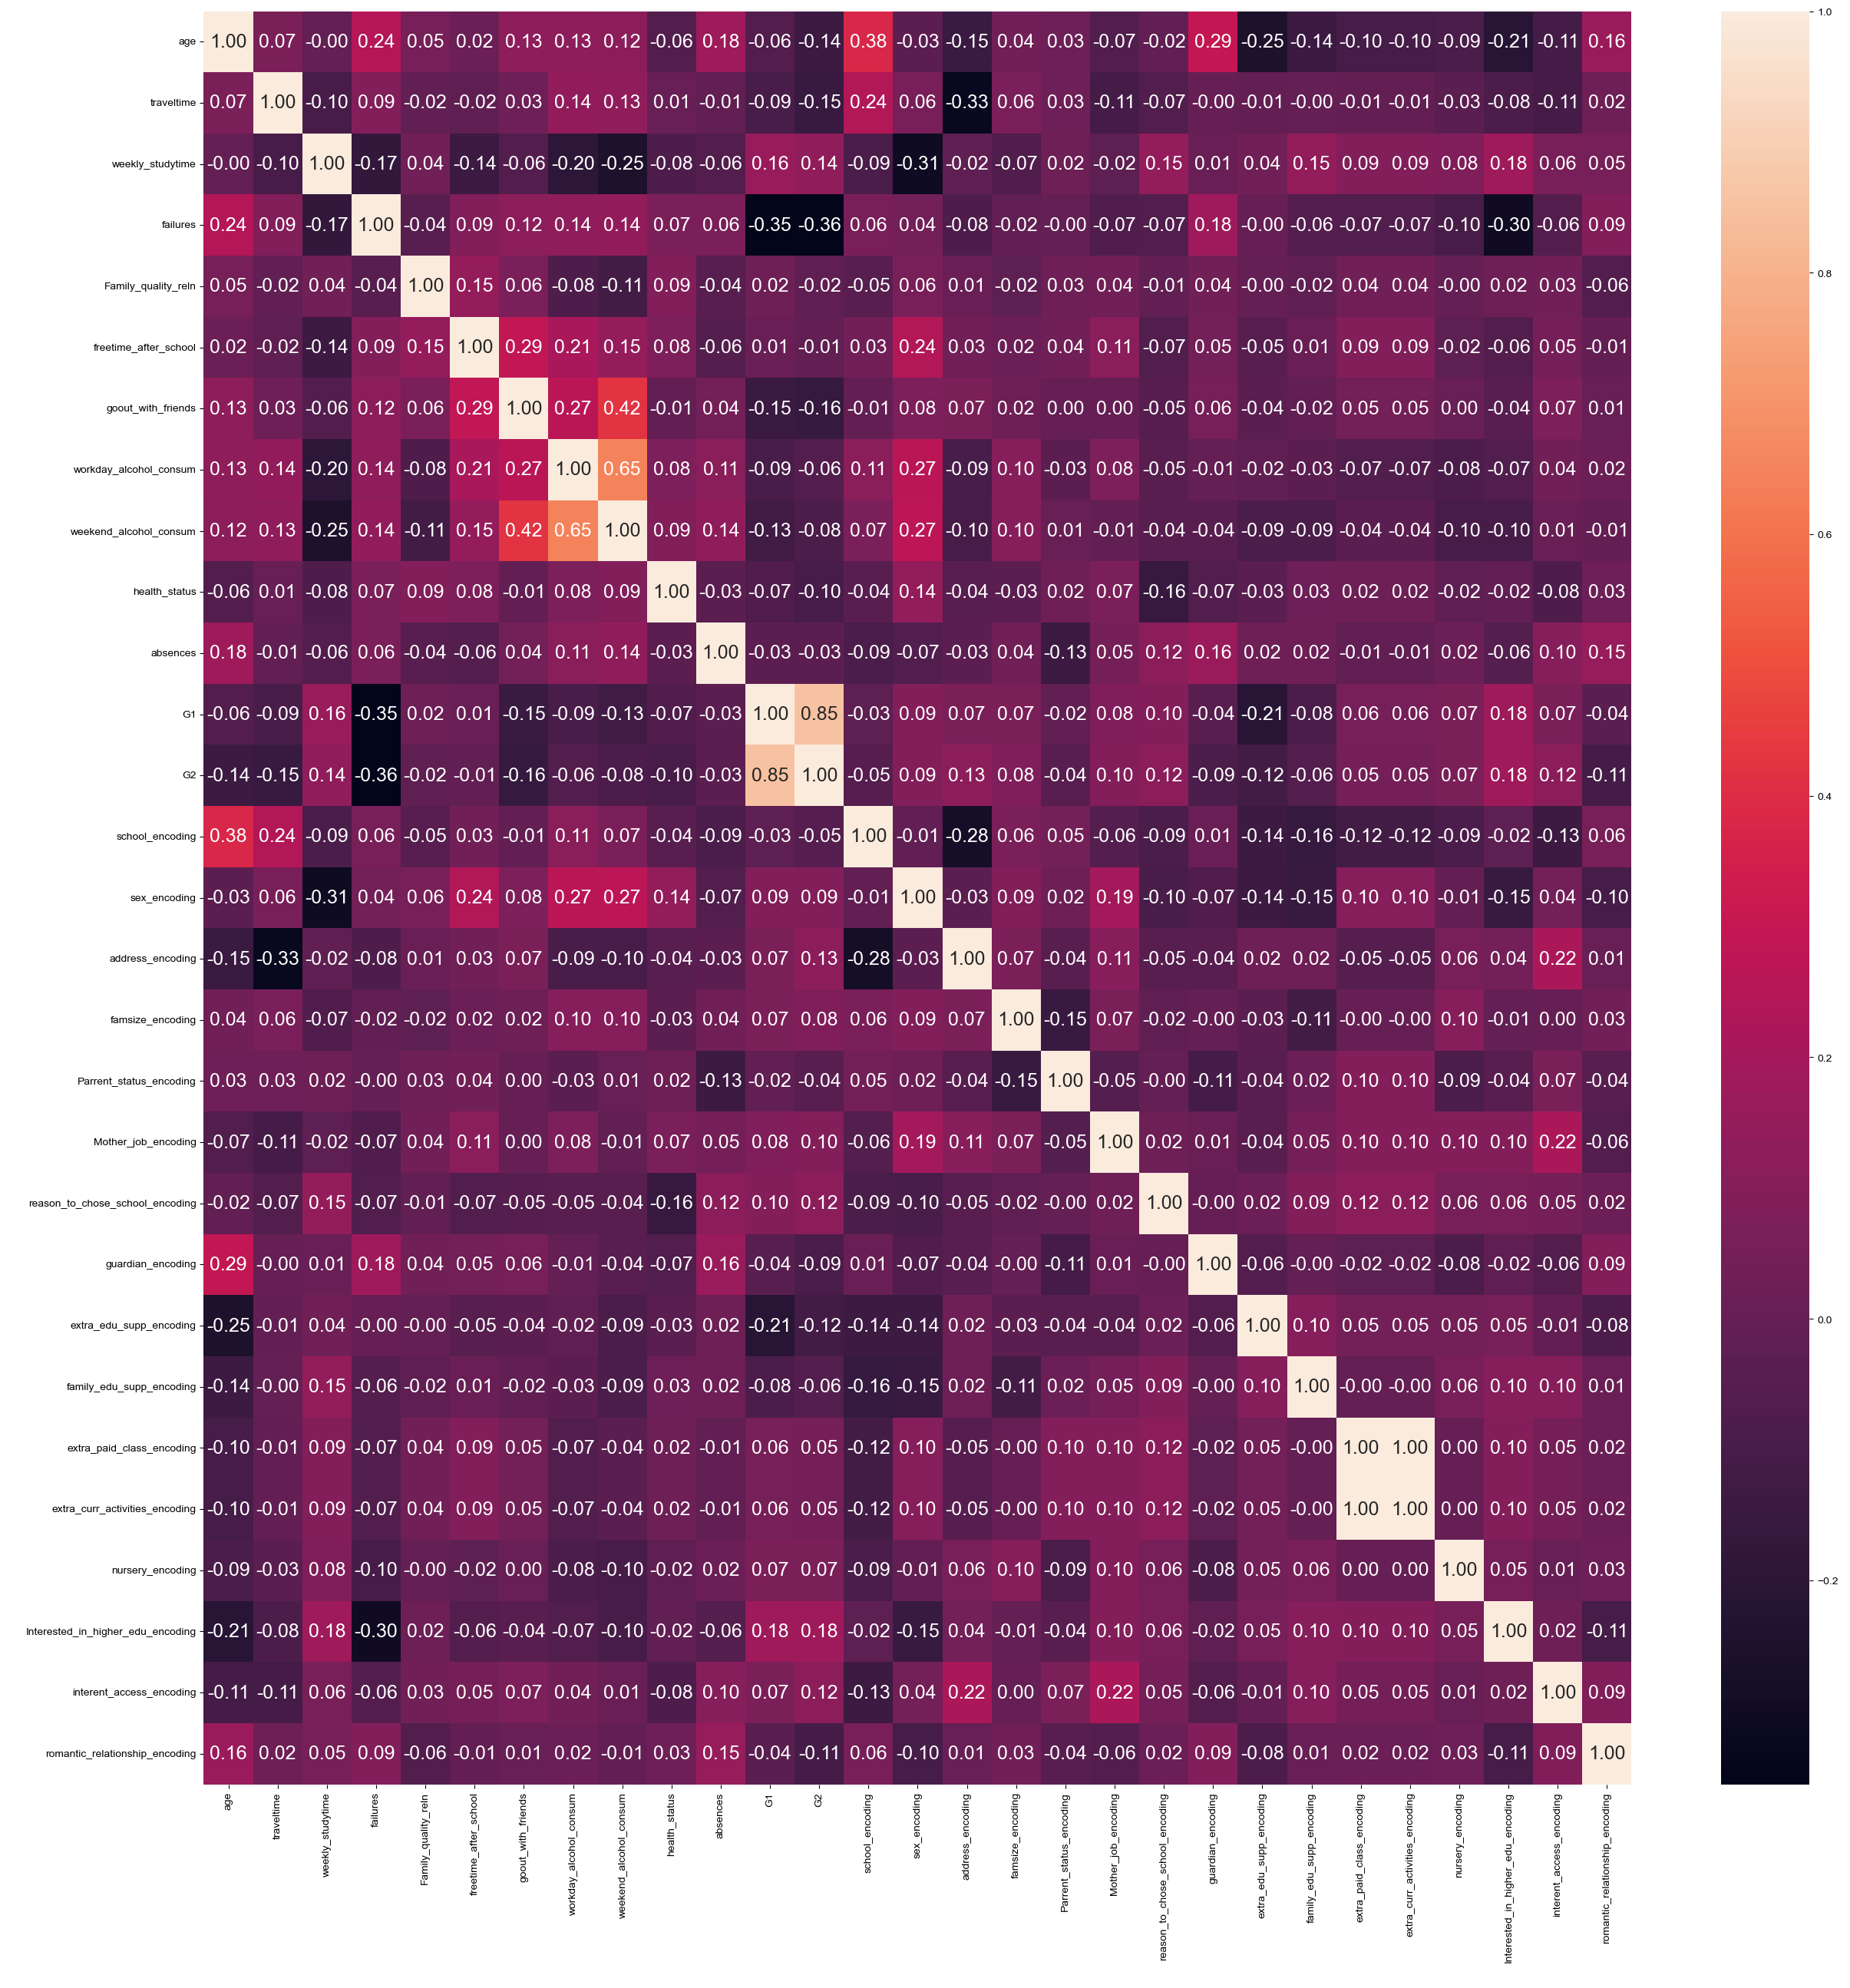

In [29]:
plt.figure(figsize=(30,30))
sns.heatmap(x.corr(),annot=True,fmt=".2f",annot_kws={"size": 18},xticklabels=x.columns, yticklabels=x.columns)
sns.set(font_scale=2)
plt.show()

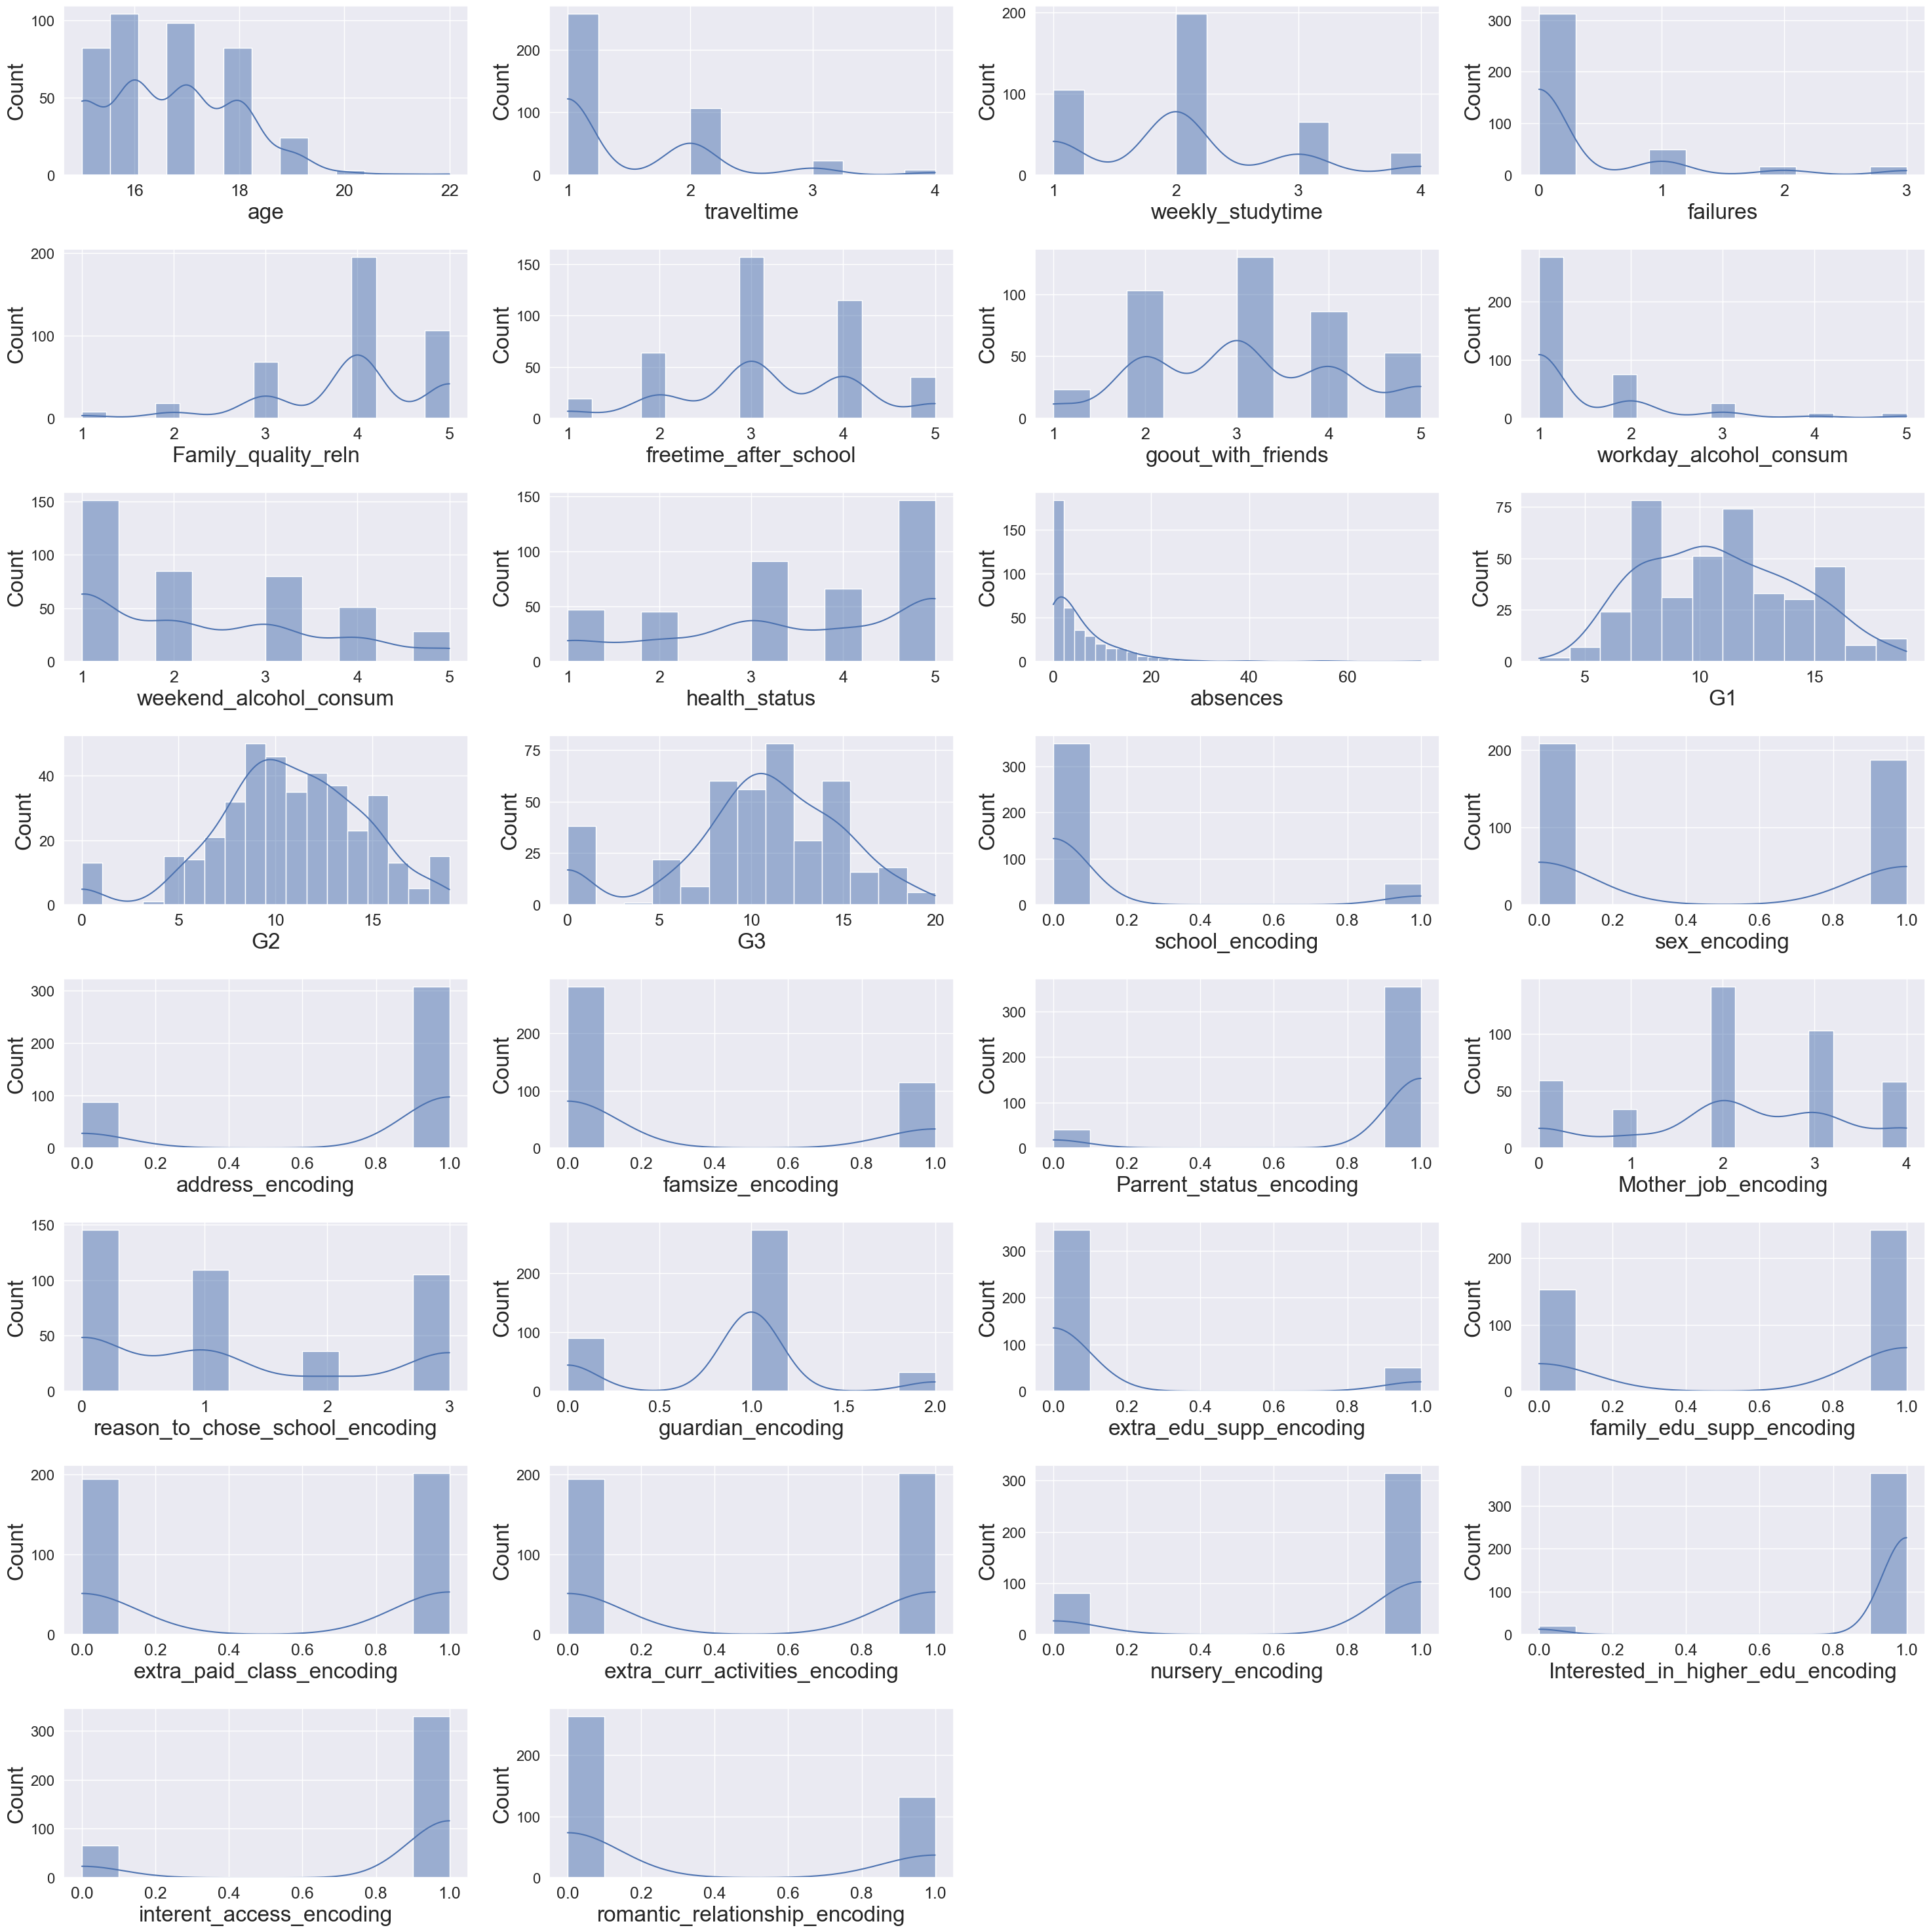

In [30]:
plt.figure(figsize=(30,30))
plotnumber=1

for column in student.columns:
    if plotnumber<=32:
        ax=plt.subplot(8,4,plotnumber)
        sns.histplot(student[column],kde=True)
        plt.xlabel(column,fontsize=24)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=16)
        plotnumber +=1
plt.tight_layout()
plt.show()

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=323)

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(296, 29)
(99, 29)
(296,)
(99,)


In [33]:
scaler=StandardScaler()
x_scaled_train=scaler.fit_transform(x_train)
x_scaled_test=scaler.transform(x_test)

In [34]:
x_scaled_train

array([[ 0.24931807, -0.6227361 ,  1.10232197, ...,  0.23904572,
         0.43994135, -0.71428571],
       [-1.30432717, -0.6227361 , -0.09286962, ...,  0.23904572,
         0.43994135, -0.71428571],
       [ 0.24931807, -0.6227361 , -1.2880612 , ...,  0.23904572,
        -2.27303028,  1.4       ],
       ...,
       [-1.30432717, -0.6227361 , -0.09286962, ...,  0.23904572,
        -2.27303028, -0.71428571],
       [ 0.24931807, -0.6227361 , -0.09286962, ...,  0.23904572,
         0.43994135,  1.4       ],
       [-0.52750455, -0.6227361 , -0.09286962, ...,  0.23904572,
         0.43994135, -0.71428571]])

In [35]:
x_scaled_test

array([[-0.52750455, -0.6227361 , -1.2880612 , ...,  0.23904572,
        -2.27303028,  1.4       ],
       [ 1.02614069,  0.82868032, -1.2880612 , ...,  0.23904572,
         0.43994135, -0.71428571],
       [-0.52750455,  0.82868032, -0.09286962, ...,  0.23904572,
         0.43994135,  1.4       ],
       ...,
       [-0.52750455, -0.6227361 , -0.09286962, ...,  0.23904572,
         0.43994135,  1.4       ],
       [ 0.24931807,  0.82868032, -0.09286962, ...,  0.23904572,
         0.43994135, -0.71428571],
       [-1.30432717,  3.73151314,  2.29751355, ...,  0.23904572,
         0.43994135,  1.4       ]])

R2: 0.8444868127277669
Adjusted R^2: 0.7791261977872632
Mean Squared Error: 3.5062424314528076
Coefficients: [-2.88798963e-01  8.55542910e-02 -1.44733030e-02 -1.71184512e-01
  2.94510618e-01  6.17560455e-02  8.15383523e-02 -1.60769765e-01
  1.07296432e-01  8.63114739e-02  4.19860488e-01  7.14906571e-01
  3.39943202e+00  2.28675827e-01  1.57989303e-02 -3.44157437e-02
  1.02470001e-01 -5.27340448e-02  8.23670852e-02  1.09494343e-01
  6.85263663e-02  1.09878562e-01 -6.28235656e-03  1.02840102e+13
 -1.02840102e+13 -1.22511258e-01  6.82154532e-02  1.25206824e-02
 -7.59390216e-03]
Intercept: 10.45945945945946


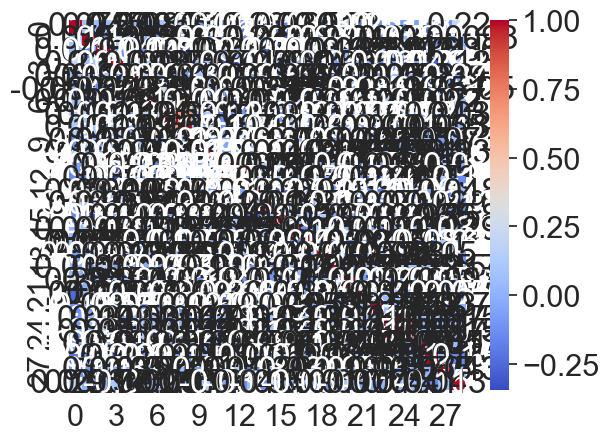

Features with zero variance: []
t-statistics: [-1.02467455e+00  3.52489832e-01 -5.67113237e-02 -6.71416781e-01
  1.27094788e+00  2.51613566e-01  3.08447276e-01 -5.29300986e-01
  3.23944444e-01  3.62350305e-01  1.71085379e+00  1.57734697e+00
  7.54863444e+00  8.72218222e-01  5.77488141e-02 -1.34069378e-01
  4.39607146e-01 -2.24717081e-01  3.40812972e-01  4.66417891e-01
  2.82442722e-01  4.49204996e-01 -2.61146746e-02  8.68146440e+13
 -8.68146440e+13 -5.28947447e-01  2.69785454e-01  5.16625643e-02
 -3.14929650e-02]
p-values for t-tests: [0.30909577235345287, 0.7255453710100475, 0.9549390590673901, 0.5041967327235661, 0.20801535360620393, 0.8020876622470883, 0.7586713248724424, 0.5982954976411099, 0.7469600019098346, 0.7181977553112404, 0.0916007657848017, 0.11928973624010775, 1.3358847361644166e-10, 0.38611438062856185, 0.9541156243371187, 0.8937379996761823, 0.6615954736694942, 0.8228635256944479, 0.7342799376531568, 0.6423856518543674, 0.7784495758552774, 0.6546915823988106, 0.97924125

In [37]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the linear regression model
reg = LinearRegression()
reg.fit(x_scaled_train, y_train)

# Make predictions
y_pred = reg.predict(x_scaled_test)

# Calculate R^2 and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
n = x_scaled_test.shape[0]  # Number of samples
p = x_scaled_test.shape[1]  # Number of features

# Adjusted R^2
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print out R^2 and Adjusted R^2
print("R2:", r2)
print("Adjusted R^2:", adjusted_r2)
print("Mean Squared Error:", mse)

# Print coefficients and intercept
coefficients = reg.coef_
intercept = reg.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Add intercept to the training data
X_train_with_intercept = np.c_[np.ones(x_scaled_train.shape[0]), x_scaled_train]

# Calculate residuals
y_train_pred = reg.predict(x_scaled_train)
residuals = y_train - y_train_pred
sigma_squared = np.sum(residuals ** 2) / (n - p - 1)

# Check for multicollinearity by plotting the correlation matrix
correlation_matrix = np.corrcoef(x_scaled_train.T)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

# Check for constant columns
feature_variances = np.var(x_scaled_train, axis=0)
zero_variance_features = np.where(feature_variances == 0)[0]
print("Features with zero variance:", zero_variance_features)

# Calculate the pseudo-inverse of X'X to avoid singular matrix error
XTX_inv = np.linalg.pinv(np.dot(X_train_with_intercept.T, X_train_with_intercept))

# Calculate covariance matrix and standard errors
cov_matrix = sigma_squared * XTX_inv
std_errors = np.sqrt(np.diag(cov_matrix))

# Calculate t-statistics and p-values for t-tests
t_stats = coefficients / std_errors[1:]  # skip the intercept for t-stat calculation
p_values_t = [2 * (1 - stats.t.cdf(np.abs(t), df=n - p - 1)) for t in t_stats]

# Print t-statistics and p-values
print("t-statistics:", t_stats)
print("p-values for t-tests:", p_values_t)

# Calculate F-statistic for overall model significance
ssr = np.sum((y_train_pred - np.mean(y_train)) ** 2)  # Regression sum of squares
sse = np.sum((y_train - y_train_pred) ** 2)  # Residual sum of squares
f_statistic = (ssr / p) / (sse / (n - p - 1))

# Calculate p-value for F-test
p_value_f = 1 - stats.f.cdf(f_statistic, p, n - p - 1)

# Print F-statistic and p-value for the overall model
print("F-statistic:", f_statistic)
print("p-value for F-test:", p_value_f)

Best alpha found by LassoCV: 0.14849682622544635


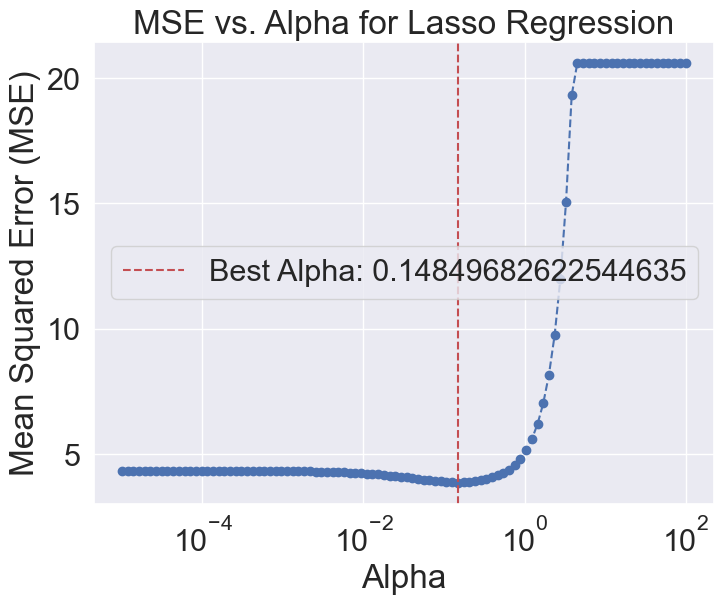

R2 Score: 0.8499487048142313
Mean Squared Error: 3.38309713345275
Coefficients [-0.0503832   0.         -0.         -0.06097666  0.1297164   0.
  0.         -0.          0.          0.          0.21842564  0.56884496
  3.40549763  0.          0.         -0.          0.         -0.
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.          0.00728003  0.         -0.        ]
Intercept 10.45945945945946
                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     196.9
Date:                Wed, 08 Jan 2025   Prob (F-statistic):          8.03e-106
Time:                        21:29:08   Log-Likelihood:                -606.44
No. Observations:                 296   AIC:                             1229.
Df Residua

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import statsmodels.api as sm

alphas = np.logspace(-5, 2, 100)  

lasso_cv = LassoCV(alphas=alphas, cv=5) 
lasso_cv.fit(x_scaled_train, y_train)

best_alpha = lasso_cv.alpha_
print("Best alpha found by LassoCV:", best_alpha)

mse_path = lasso_cv.mse_path_.mean(axis=1)  # Mean MSE across cross-validation folds
plt.figure(figsize=(8, 6))
plt.plot(lasso_cv.alphas_, mse_path, marker='o', linestyle='--')
plt.axvline(best_alpha, linestyle='--', color='r', label=f'Best Alpha: {best_alpha}')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Alpha for Lasso Regression')
plt.legend()
plt.show()

lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(x_scaled_train, y_train)
y_pred = lasso_best.predict(x_scaled_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Coefficients", lasso_best.coef_)
print("Intercept", lasso_best.intercept_)

non_zero_coeff_indices = np.where(lasso_best.coef_ != 0)[0]
x_train_selected = x_scaled_train[:, non_zero_coeff_indices]  

X_train_selected_ols = sm.add_constant(x_train_selected) 
ols_model = sm.OLS(y_train, X_train_selected_ols).fit()

print(ols_model.summary())
p_values = ols_model.pvalues
f_statistic = ols_model.fvalue
p_value_f_test = ols_model.f_pvalue

print("P-values for coefficients:", p_values)
print("F-statistic:", f_statistic)
print("p-value for F-test:", p_value_f_test)